# Solar photon flux on Earth
# Photoelectric yield
# Solar photoelectric yield on Earth

In [160]:
import numpy as np
import matplotlib.pyplot as plt

# Planck’s constant
h = 6.62607004e-34
# speed of light m/s
c = 299792458
# Boltzmann in J/K
k_B =1.38064852e-23  
#electron charge in [C]
q_e = 1.60217646e-19 
#distance Sun-Earth
au = 1.496e+11
#radius Earth in m
R_Earth = 6.372e+6
#radius Sun in m
R_Sun = 6.9574e+8
#Temperature Sun in K
T_Sun = 5600 
#max photon yield for a given material
y_max = 0.3
#photon yield at work function for a given material
y_0 = 1e-7
#work function in eV of some material
wf = 4.8
#critical wl in nm of some material
lc = eVtonm(wf)

def eVtonm(eV):
    nm = h*c/(eV*q_e)*1e9
    return nm

def nmtoeV(nm):
    eV = h*c/(nm*q_e)*1e9
    return eV

#photoelectric yield as a function of the wavelength for a single wavelenght in nm
def photoyield(x, y_max, y_0, lambda_c):
    wf = nmtoeV(lambda_c)
    lambda_b = eVtonm(wf+10)
    k = 1/(lambda_c-lambda_b)*np.log(y_max/y_0) 
    A = y_max*(y_max/y_0)**(lambda_b/(lambda_c-lambda_b))
    if (x <= lambda_b):
        photo_yield = y_max
    else:
        photo_yield = A*np.exp(-k*x)
    return photo_yield

#photoelectric yield for an array of wavelengths in nm
def photoyieldarray(Emin, Emax, y_max, y_0, lc):
    lambdamin = eVtonm(Emax)
    lambdamax = eVtonm(Emin)
    array = np.linspace(lambdamin, lambdamax,1000)
    phyield = [photoyield(array, y_max, y_0, lc) for array in array]
    res = [array, phyield]
    return array, phyield

def solidangle(d, R, r):
    angle = np.pi*(R/(d-r))**2
    return angle

#number of photons per unit wavelength (m-1) per unit area (m-2) per unit time (s-1) arriving from black body at temp T (e.g. Sun) to another object (e.g. Earth). 
#units m-1 m-2 s-1  
def nlambda(x, T, angle):
    x = 10**-9*x
    E_p = h*c/x
    n = 2*h*c**2/x**5/(np.exp(h*c/(x*k_B*T))-1)*angle/E_p
    return n

#solar photon flux in cm-2 s-1 eV-1
def solarflux(Emin, Emax, T, d, r, R):
    lambdamin = eVtonm(Emax)
    lambdamax = eVtonm(Emin)
    lambdas = np.linspace(lambdamin, lambdamax,1000)
    dlambda = np.gradient(lambdas*1e-9)
    dE = -np.gradient(nmtoeV(lambdas))
    Omega_Sun = solidangle(d, R, r)
    flux = nlambda(lambdas, T_Sun, Omega_Sun)*dlambda/dE*1e-4
    res = [nmtoeV(lambdas), flux]
    return res

def peflux(Emin, Emax, T, d, r, R, y_max, y_0, lambda_c):
    lambdamin = eVtonm(Emax)
    lambdamax = eVtonm(Emin)
    lambdas = np.linspace(lambdamin, lambdamax,1000)
    peflux = solarflux(Emin, Emax, T, d, r, R)[1]*photoyieldarray(Emin, Emax, y_max, y_0, lc)[1]
    res = [nmtoeV(lambdas), peflux]
    return res


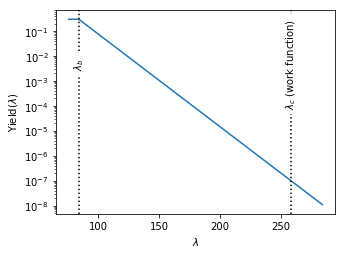

In [156]:
fig, ax = plt.subplots(figsize=(5, 3.75))
lb = eVtonm(wf+10)
xmin = (lb)*0.9
xmax = lc*1.1
Emin = nmtoeV(xmax)
Emax = nmtoeV(xmin)
x = photoyieldarray(Emin, Emax, y_max, y_0, lc)[0]
y = photoyieldarray(Emin, Emax, y_max, y_0, lc)[1]
plt.plot(x, y)
plt.axvline(x=lb, color='black', linestyle=':')
plt.axvline(x=lc, color='black', linestyle=':')
plt.text(lb, 0.005, '$\lambda_b$', ha='center', va='center',rotation='vertical', backgroundcolor='white')
plt.text(lc, 0.005, '$\lambda_c$ (work function)', ha='center', va='center',rotation='vertical', backgroundcolor='white')
plt.yscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Yield($\lambda$)');

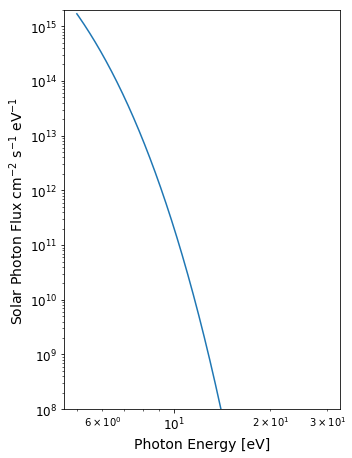

In [158]:
plt.figure(figsize=(5,5*839/648))
Emin = 5
Emax = 30
plt.loglog(solarflux(Emin, Emax, T_Sun, au, R_Earth, R_Sun)[0], solarflux(Emin, Emax, T_Sun, au, R_Earth, R_Sun)[1])
plt.xlabel('Photon Energy [eV]', fontsize=14) 
plt.ylabel('Solar Photon Flux cm$^{-2}$ s$^{-1}$ eV$^{-1}$', fontsize =14) 
plt.tick_params(labelsize=12)
plt.ylim(1e8,2e15)
plt.tight_layout() 

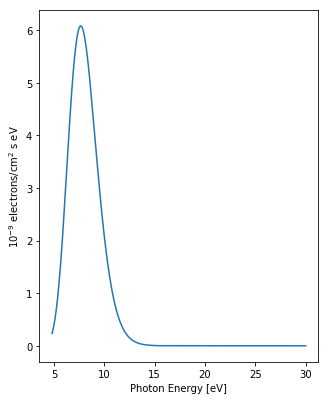

In [161]:
plt.figure(figsize=(5,5*839/648))
Emin = wf
Emax = 30
lambdamin = eVtonm(Emax)
lambdamax = eVtonm(Emin)
lambdas = np.linspace(lambdamin, lambdamax,1000)
lc = eVtonm(wf)
x_val = peflux(Emin, Emax, T_Sun, au, R_Earth, R_Sun, y_max, y_0, lc)[0]
y_val = peflux(Emin, Emax, T_Sun, au, R_Earth, R_Sun, y_max, y_0, lc)[1]*1e-9
plt.plot(x_val, y_val)
plt.xlabel('Photon Energy [eV]')
plt.ylabel('$10^{-9}$ electrons/cm$^2$ s eV');